In [3]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pandas import *

In [31]:
dataset =read_csv("data.csv")

In [32]:
dataset

,Rainfall,Temperature,Ph,Production
0,1000.49920,35.00000,5.5,0.03994
1,1001.68519,35.00000,5.5,0.13481
2,1001.95313,34.00000,5.5,0.15625
3,1002.18254,33.66667,5.5,0.17460
4,1002.37279,33.16667,5.5,0.18982
...,...,...,...,...
1518,1137.50000,39.00000,5.8,11.00000
1519,1138.75000,39.00000,5.8,11.10000
1520,1138.97059,39.00000,5.8,11.11765
1521,1144.65881,35.00000,5.8,11.12760


In [6]:
#dataset =get_data('bike')

In [33]:
dataset.describe()

,Rainfall,Temperature,Ph,Production
count,1523.000000,1523.000000,1523.000000,1523.000000
mean,1027.102072,18.976472,5.897045,2.162630
std,33.114394,5.051640,0.187024,2.633592
min,1000.499200,11.000000,5.500000,0.039940
25%,1010.000000,17.000000,5.800000,0.782910
50%,1015.039060,17.000000,5.800000,1.203130
75%,1024.082230,21.000000,6.000000,1.926580
max,1241.250000,39.000000,6.500000,19.300000


In [37]:
from pycaret.regression import *
s = setup(dataset, target = 'Production',use_gpu=True )

,Description,Value
0,session_id,5921
1,Target,Production
2,Original Data,"(1523, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1066, 3)"


In [38]:
from numba import jit,cuda
@jit(backend= cuda)
def bestmodel():
    best = compare_models()
    return best

In [39]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0161,0.0021,0.0424,0.9997,0.0133,0.0138,0.0060
en,Elastic Net,0.0233,0.0025,0.0476,0.9997,0.0135,0.0170,0.0060
lar,Least Angle Regression,0.0161,0.0021,0.0424,0.9997,0.0133,0.0138,0.0050
omp,Orthogonal Matching Pursuit,0.0144,0.0022,0.0426,0.9997,0.0122,0.0095,0.0050
br,Bayesian Ridge,0.0160,0.0021,0.0423,0.9997,0.0133,0.0136,0.0050
ridge,Ridge Regression,0.0159,0.0021,0.0423,0.9997,0.0132,0.0134,0.0050
lasso,Lasso Regression,0.0312,0.0031,0.0546,0.9996,0.0154,0.0235,0.0060
dt,Decision Tree Regressor,0.0132,0.0215,0.0920,0.9973,0.0084,0.0056,0.0070
et,Extra Trees Regressor,0.0093,0.0220,0.0768,0.9972,0.0078,0.0051,0.6360
gbr,Gradient Boosting Regressor,0.0184,0.0223,0.0773,0.9972,0.0100,0.0129,0.0450


In [43]:
a=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0118,0.0006,0.0236,0.9999,0.0071,0.0077
1,0.0099,0.0003,0.0185,0.9999,0.0053,0.0069
2,0.0227,0.0036,0.0597,0.9996,0.0170,0.0171
3,0.0163,0.0025,0.0501,0.9996,0.0173,0.0148
4,0.0186,0.0033,0.0571,0.9994,0.0160,0.0140
5,0.0202,0.0045,0.0674,0.9996,0.0083,0.0077
6,0.0214,0.0031,0.0560,0.9995,0.0247,0.0310
7,0.0104,0.0006,0.0250,0.9998,0.0135,0.0119
8,0.0183,0.0022,0.0464,0.9998,0.0155,0.0136


In [50]:
evaluate_model(a)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [1]:
a.intercept_


NameError: name 'a' is not defined

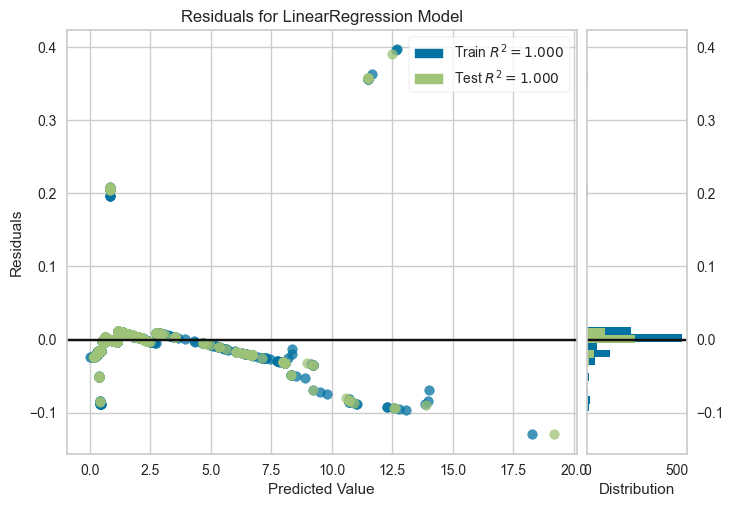

In [49]:
plot_model(a)

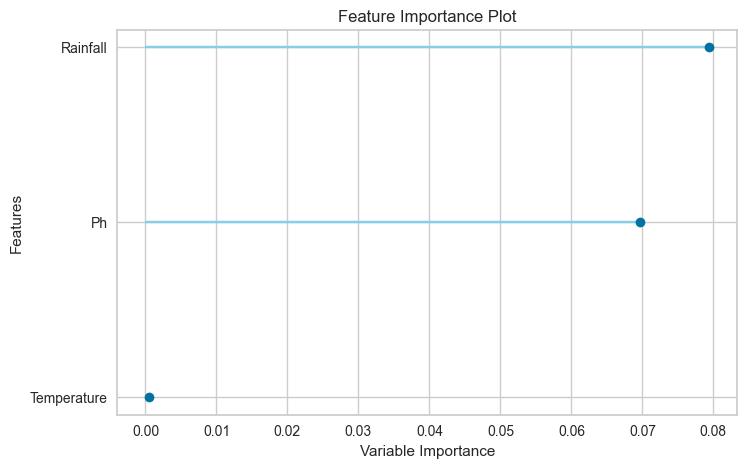

In [46]:
plot_model(a, plot = 'feature')